In [8]:
import pandas as pd
import os
import numpy as np
from tqdm.notebook import tqdm


In [5]:
# df = pd.DataFrame(columns=["image", "moa"])

In [ ]:
# df_path = pd.DataFrame(columns=["path", "moa"])

# num_lines = sum(1 for line in open('path.txt'))

# with open("path.txt", "r") as f:
#     for line in tqdm(f, total=num_lines):
#         moa, path = line.strip().split(', ')
#         for filename in os.listdir(path):
#             filepath = os.path.join(path, filename)
#             df_path.loc[0 if pd.isnull(df_path.index.max()) else df_path.index.max() + 1] = {"path" : filepath, "moa" : moa}

In [10]:
from collections import Counter
df_path = pd.read_csv("Data_paths.csv")

In [11]:
df_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432923 entries, 0 to 432922
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   path    432923 non-null  object
 1   moa     432923 non-null  object
dtypes: object(2)
memory usage: 6.6+ MB


In [12]:
distribution = Counter(df_path.moa)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

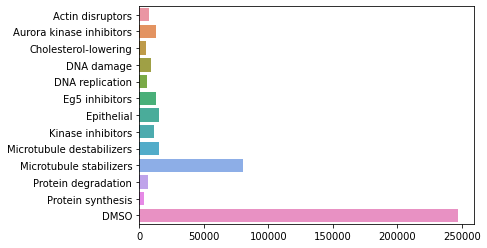

In [14]:
#plt.figure(figsize=(8,8))
ax = sns.barplot(y=list(distribution.keys()), x=list(distribution.values()))


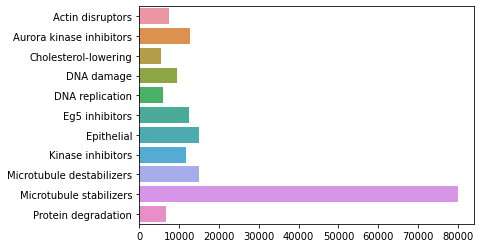

In [44]:
#plt.figure(figsize=(8,8))
ax = sns.barplot(y=list(distribution.keys())[:-2], x=list(distribution.values())[:-2])


In [34]:
dftable = pd.DataFrame(columns= list(distribution.keys()))
dftable.loc[0] = list(distribution.values())
pd.DataFrame(list(distribution.values()), list(distribution.keys()), columns= ['n_samples'])

,n_samples
Actin disruptors,7412
Aurora kinase inhibitors,12821
Cholesterol-lowering,5415
DNA damage,9391
DNA replication,6019
Eg5 inhibitors,12545
Epithelial,14929
Kinase inhibitors,11622
Microtubule destabilizers,15055
Microtubule stabilizers,80089


In [ ]:
with open("path.txt", "r") as f:
    for line in tqdm(f):
        moa, path = line.strip().split(', ')
        for filename in os.listdir(path):
            filepath = os.path.join(path, filename)
            image = np.load(filepath)
            df.loc[0 if pd.isnull(df.index.max()) else df.index.max() + 1] = {"image" : image, "moa" : moa}


In [ ]:
def get_amount_of_files(df_path):
    sum = 0
    for path in df_path['path']:
        for index, filename in enumerate(os.listdir(path)):
            sum += 1
    return sum


In [2]:
df_path = pd.read_csv("Data_paths.csv")


In [26]:
N = df_path.shape[0]
X = np.empty(shape=(N,68,68,3), dtype="int16")

MemoryError: Unable to allocate 22.4 GiB for an array with shape (432923, 68, 68, 3) and data type int32

In [10]:
for index, path in tqdm(enumerate(df_path['path']), total = N):
    image = np.load(path)
    X[index,:,:,:] = image
    if index ==5: break
print(X.shape)

  0%|          | 0/432923 [00:00<?, ?it/s]

(432923, 68, 68, 3)


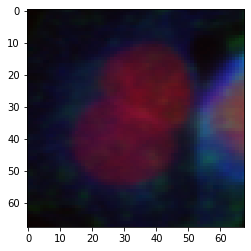

In [23]:
import matplotlib.pyplot as plt

plt.imshow(X[1,:,:,:].astype("float64")/255)

In [45]:
df = pd.read_csv("raw_data.csv")

In [46]:
df.head()

,image,moa
0,[[[10 1 1]\n [ 9 1 1]\n [10 2 1]\n .....,Actin disruptors
1,[[[11 3 2]\n [11 3 2]\n [10 3 2]\n .....,Actin disruptors
2,[[[11 2 2]\n [12 2 1]\n [11 2 1]\n .....,Actin disruptors
3,[[[10 2 2]\n [11 2 2]\n [11 2 2]\n .....,Actin disruptors
4,[[[11 2 2]\n [ 9 2 2]\n [ 8 2 1]\n .....,Actin disruptors


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432923 entries, 0 to 432922
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   image   432923 non-null  object
 1   moa     432923 non-null  object
dtypes: object(2)
memory usage: 6.6+ MB
